In [1]:
import numpy as np
import tensorflow as tf

텐서플로의 데이터 포맷 : 
- (m, n) , m:데이터 갯수, n:특징 수
- 시계열/시퀀스 데이터 : (m, t, n) , m:데이터 갯수, t:시간, n:특징 수 
- 영상 (m, h, w, c) , (갯수,높이,너비,채널)    ,  CAFFE (m,c,h,w)
- 커널 (h, w, c, m) 

In [12]:
x = np.arange(1, 10).reshape([1,3,3,1]).astype(np.float32)  
x.dtype
x[0, :, :, 0]

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)

맥스 풀링, ksize, stride = [2,2]  SAME(zero 패딩)  를 주로 사용합니다  

In [25]:
out = tf.nn.max_pool(value=x, ksize=[2,2],strides=[2, 2], padding='SAME')#VALID or SAME, kernel = filter

In [26]:
sess = tf.InteractiveSession() # .eval() 로 값을 바로 볼 수 있습니다

In [27]:
out.eval()

array([[[[5.],
         [6.]],

        [[8.],
         [9.]]]], dtype=float32)

In [37]:
kernel = np.arange(1,5).reshape([2,2,1,1]).astype(np.float32) #(h,w,c,m)

In [38]:
x[0, :, :, 0]

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)

In [39]:
kernel[:,:,0,0]

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [48]:
out = tf.nn.conv2d(x, kernel, strides=[1, 1], padding='SAME')

In [50]:
out.eval()[:,:,:,0]

array([[[37., 47., 21.],
        [67., 77., 33.],
        [23., 26.,  9.]]], dtype=float32)

In [43]:
np.array([5,6,8,9]) * np.array([1,2,3,4]), np.sum(np.array([5,6,8,9]) * np.array([1,2,3,4]))

(array([ 5, 12, 24, 36]), 77)

In [53]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/")

In [62]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000,))

In [65]:
np.sqrt(784)

28.0

In [78]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels
x_train.shape, x_test.shape

((55000, 784), (10000, 784))

In [72]:
x0 = x_train[1]
x0_2d = x0.reshape([28, 28])

In [73]:
import matplotlib.pyplot as plt

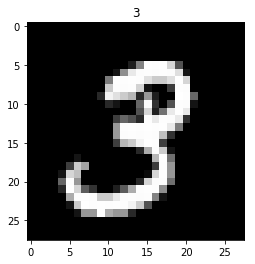

In [74]:
plt.title(str(y_train[1]))
plt.imshow(x0_2d, cmap='gray')

In [ ]:
import tensorflow.contrib.slim as slim
from sklearn.metrics import accuracy_score
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.int32, [None]) # sparse_cross_entropy
z = slim.fully_connected(X, 10)
h = tf.nn.softmax(z) #z : logits, 가능성, 점수 
cost = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y, logits=z)#logits 은 softmax 하기 전의 값
cost = tf.reduce_mean(cost)
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [96]:
for i in range(10): # 에포크
    _, _cost = sess.run([train, cost], {X:x_train, Y:y_train})
p = np.argmax( sess.run(h, {X:x_train} ) , axis=-1)
_cost, accuracy_score(y_train, p)

(0.5775667, 0.8612)

In [98]:
p = np.argmax( sess.run(h, {X:x_test} ) , axis=-1)
accuracy_score(y_test, p)

0.8716

In [99]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.91      0.96      0.94      1135
           2       0.89      0.83      0.86      1032
           3       0.84      0.86      0.85      1010
           4       0.86      0.88      0.87       982
           5       0.87      0.73      0.80       892
           6       0.88      0.92      0.90       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.83      0.81       974
           9       0.83      0.84      0.84      1009

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

